# Business Understanding
1. How do the number of listings and prices vary in the Seattle's neighbourhoods?
2. Do the room or property types change the price?
3. Are there extra fees and how do they vary?

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from folium.plugins import HeatMap
import numpy as np
%matplotlib inline

In [2]:
#If you have not yet installed ipynb,uncomment the line below first
#!pip install ipynb
# Import customarized functions from my_functions notebook
from ipynb.fs.full.my_functions import cat_counts
from ipynb.fs.full.my_functions import stats_description

# Data Understanding

In [3]:
# import data
df = pd.read_csv('Seattle_data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [5]:
# Number of rows and columns in the dataset 
cat_df =df.select_dtypes(include=['object']).copy() 
num_rows = df.shape[0] #Provide the number of rows in the dataset
print ("number of rows = {}".format(num_rows))

#Provide the number of rows in the dataset
num_cols = df.shape[1]
print ("number of columns = {}".format(num_cols))

number of rows = 3818
number of columns = 92


In [6]:
#Columns without missing values
no_nulls =set(df.columns[df.isnull().mean()==0])
no_nulls = pd.DataFrame(no_nulls,columns=['Column_without_NANs']).shape[0]
print ("number of columns without NaNs = {}".format(no_nulls))

number of columns without NaNs = 47


In [7]:
#Columns with only missing values
All_nulls =df.columns[df.isna().all()].tolist()
All_nulls = pd.DataFrame(All_nulls,columns=['Columns_only_NANs'])
All_nulls

,Columns_only_NANs
0,license


In [8]:
#Columns with more than half of the values missing.
no_nulls =set(df.columns[df.isnull().mean()>0.5])
no_nulls = pd.DataFrame(no_nulls,columns=['Column_with_50%_NAN'])
no_nulls

,Column_with_50%_NAN
0,monthly_price
1,security_deposit
2,license
3,square_feet


In [9]:
#Columns with more than 75% of the values missing.
no_nulls =set(df.columns[df.isnull().mean()>0.75])
no_nulls = pd.DataFrame(no_nulls,columns=['Column_with_75%_NAN'])
no_nulls

,Column_with_75%_NAN
0,license
1,square_feet


In [10]:
# Categorical columns.
cat_vars = df.select_dtypes(include=['object']).copy().columns
cat_vars

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [11]:
# Costs and scores related features mislabelled as categorical values
miscategorized_vars = df[['price','security_deposit','cleaning_fee','extra_people','host_response_rate','host_acceptance_rate']]
miscategorized_vars.head()

,price,security_deposit,cleaning_fee,extra_people,host_response_rate,host_acceptance_rate
0,$85.00,NaN,NaN,$5.00,96%,100%
1,$150.00,$100.00,$40.00,$0.00,98%,100%
2,$975.00,"$1,000.00",$300.00,$25.00,67%,100%
3,$100.00,NaN,NaN,$0.00,NaN,NaN
4,$450.00,$700.00,$125.00,$15.00,100%,NaN


* We observe that some of the numeric variables are miscategorized as categorical and we shall have to change them to numeric.

In [12]:
# numeric columns.
num_vars = df.select_dtypes(include=['int','float']).copy().columns
num_vars

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

# Data Preparation

* Based on the results above, the licence column has no values and this serves no purpose in this study.
* Columns like square_feet which have more than 75% of missing values will be removed.
* The monthly_price column has more than 50% of missing values and will also be removed.
  Removing the monthly price will not affect our analysis we have the daily price of all the listings.
* Miscategorized numeric values will also be converted back.
* To help with the data processing I have created a clean_data function which I describe in detail below.

In [13]:
def clean_data(df):
    '''
    Function that will help in data preprocessing and cleaning
    
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    clean_df - A dataframe with mssing values removed or interpolated
    
    This function cleans df using the following steps;
    1. Drop all the columns with missing values - Licence column was the only.
    2. Drop columns with 50% or more missing values and column with "None" (experiences_offered)
    3. Remove dollar signs from cost related variables and convert them to numerics
    4. Remove the percentage sign from score related variables and convert them to numerics
    5. Missing values related to costs are filled with the mean of the column
    6. Missing values related to scores are filled with the mode of the column. 
       This is because ratings have specific values for example 1 - 10 and taking the mean may give fractional ratings.
    '''
    # Drop all the columns with Nan
    df =df.dropna(how='all',axis=1)
    #df =df.dropna(subset=['host_total_listings_count'],axis=0) 
    df = df.drop(['square_feet','monthly_price','weekly_price','experiences_offered'],axis=1)
    
    #Remove dollar signs
    fees = df[['price','security_deposit','cleaning_fee','extra_people']].columns
    for col in fees:
              df[col] = df[col].astype(str).str[1:]
              df[col] = pd.to_numeric(df[col],errors='coerce').astype('float')
    
    # Remove percentage signs
    rates = df[['host_response_rate','host_acceptance_rate']].columns
    for col in rates:
              df[col] = df[col].astype(str).str.replace('%','').astype('float')  
              
    # Fill numeric columns with the mean
    num_df = df[['security_deposit','cleaning_fee','price']].columns
    for col in num_df:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Fill numeric columns with the median
    num_df2 = df[['host_response_rate','review_scores_rating','review_scores_rating','reviews_per_month',
                 'review_scores_cleanliness','host_acceptance_rate','review_scores_cleanliness','bathrooms','reviews_per_month',
                 'review_scores_communication','review_scores_location','bedrooms','host_listings_count','beds','review_scores_communication',
                 'review_scores_value','review_scores_accuracy','review_scores_checkin','host_total_listings_count','review_scores_rating',
                 'review_scores_location','review_scores_checkin','review_scores_accuracy','review_scores_cleanliness','review_scores_value',
                 'review_scores_communication','review_scores_location','review_scores_value']].columns
    for col in num_df2:
        df[col].fillna((df[col].median()), inplace=True)
        
    return df 

In [14]:
clean_lisitings = clean_data(df)

In [15]:
#I would wish to use this preprocessed data in the price prediction model.
# For this reason i use the pandas pickle object to save and load preprocessed data.
clean_lisitings.to_pickle('Seattle_data/clean_lisitings.pkl')

# Review the cleaned listings data

In [16]:
df = pd.read_pickle('Seattle_data/clean_lisitings.pkl')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 87 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id                             3818

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3818.0,5.550111e+06,2.962660e+06,3.335000e+03,3.258256e+06,6.118244e+06,8.035127e+06,1.034016e+07
scrape_id,3818.0,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
host_id,3818.0,1.578556e+07,1.458382e+07,4.193000e+03,3.275204e+06,1.055814e+07,2.590309e+07,5.320861e+07
host_response_rate,3818.0,9.558722e+01,1.116313e+01,1.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
host_acceptance_rate,3818.0,9.997381e+01,1.618386e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
host_listings_count,3818.0,7.154531e+00,2.862099e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
host_total_listings_count,3818.0,7.154531e+00,2.862099e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
latitude,3818.0,4.762896e+01,4.305195e-02,4.750509e+01,4.760942e+01,4.762360e+01,4.766269e+01,4.773336e+01
longitude,3818.0,-1.223331e+02,3.174451e-02,-1.224172e+02,-1.223543e+02,-1.223289e+02,-1.223108e+02,-1.222406e+02
accommodates,3818.0,3.349398e+00,1.977599e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01


In [19]:
#Columns with only missing values
All_nulls =df.columns[df.isna().all()].tolist()
All_nulls = pd.DataFrame(All_nulls,columns=['Columns_only_NANs'])
All_nulls

,Columns_only_NANs


* No column has missing values

In [20]:
#Columns with more than half of the values missing.
no_nulls =set(df.columns[df.isnull().mean()>= 0.5])
no_nulls = pd.DataFrame(no_nulls,columns=['Column_with_50%_NAN'])
no_nulls

,Column_with_50%_NAN


* No columns with 50% or more missing values

# Modelling
* To address my business questions, I create these 2 functions to help in my analysis.
* Cat_counts fucntion performs value counts on categorical columns then then calculate the percentage shares.
* Stats_description functions groups the the dataframe by a categorical colummn and calculate the statistical features of a numeric column of it.
* The cat_counts and Stats_description functions are saved in the my_functions notebooks.

# How many listings are in every neighbourhood in Seattle

* To answer this questions, I count the number of listings in every neighbourhood in Seattle.
* From the counts , I calculate the percentage share of every neighbourhood in propotional to the entire district.
* I employ the cat_counts function from above.

In [21]:
# The counts and shares of listings in the different neighbourhoods.
num_listings = cat_counts(df,"neighbourhood_group_cleansed")
num_listings

,neighbourhood_group_cleansed,Count,Perc
0,Other neighborhoods,794,0.207962
1,Capitol Hill,567,0.148507
2,Downtown,530,0.138816
3,Central Area,369,0.096647
4,Queen Anne,295,0.077266
5,Ballard,230,0.060241
6,West Seattle,203,0.053169
7,Rainier Valley,159,0.041645
8,University District,122,0.031954
9,Beacon Hill,118,0.030906


### Evaluation
* We see that the number of listings vary from neighbourhood to another
* Capitol hill and Downtown account for 15% and 14% of Seattle's listings respectively.
* Interbay and Seward Park account for only 0.2% and 1.1% of Seattles's listings respectively.

# How do the listings prices vary in the different neighbourhoods?
* To answer this question, I calculate the calculate the statistical features of every neighbourhood.
* I use the stats_description function which groups the listings dataframe by the neighbourhood.
* The price statistics are calculated and presented in the table below.
* The results are also presented in the plots that follow below

In [22]:
# Listings' prices in the different neighbourhoods.
stats_description(df,"neighbourhood_group_cleansed",'price')

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Ballard,124.682609,95.0,87.925033,475.0,25.0,95.0,350.00
Beacon Hill,94.669492,75.0,61.528682,399.0,30.0,75.0,201.40
Capitol Hill,130.592593,105.0,92.442331,750.0,22.0,105.0,295.00
Cascade,140.101124,115.0,112.179042,775.0,42.0,115.0,280.00
Central Area,128.338753,100.0,80.260558,500.0,35.0,100.0,295.00
Delridge,83.278481,72.0,41.797110,300.0,35.0,72.0,148.20
Downtown,154.405660,139.0,90.902800,999.0,35.0,139.0,300.00
Interbay,109.727273,90.0,60.003485,250.0,50.0,90.0,200.00
Lake City,92.671642,70.0,57.212625,252.0,35.0,70.0,247.00
Magnolia,177.672131,129.0,150.078726,950.0,30.0,129.0,375.00


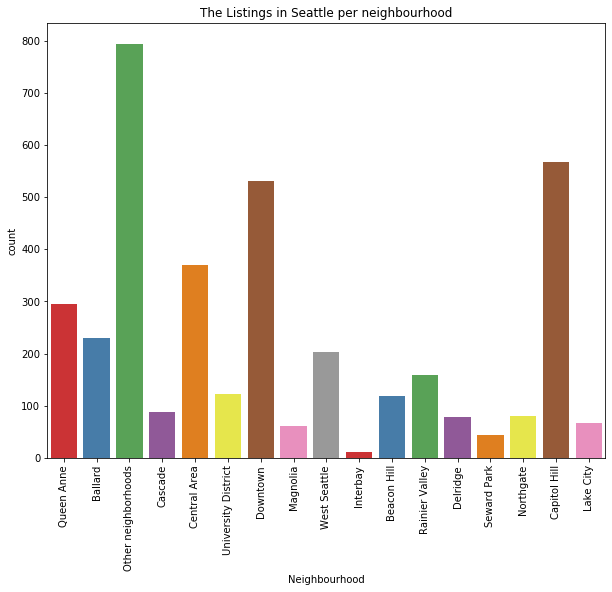

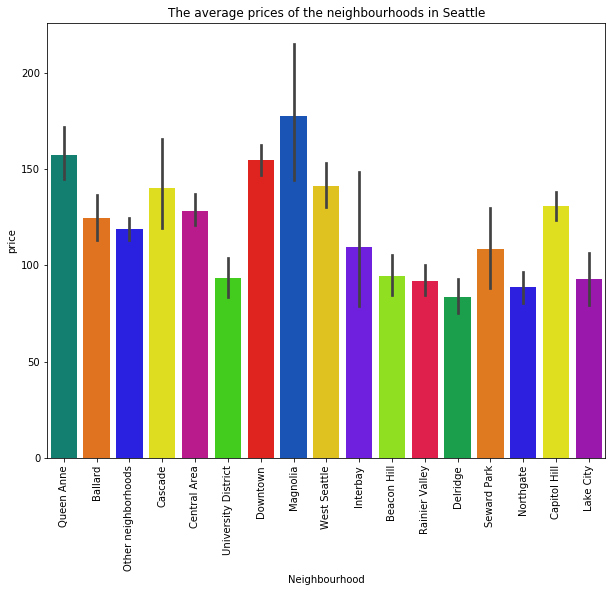

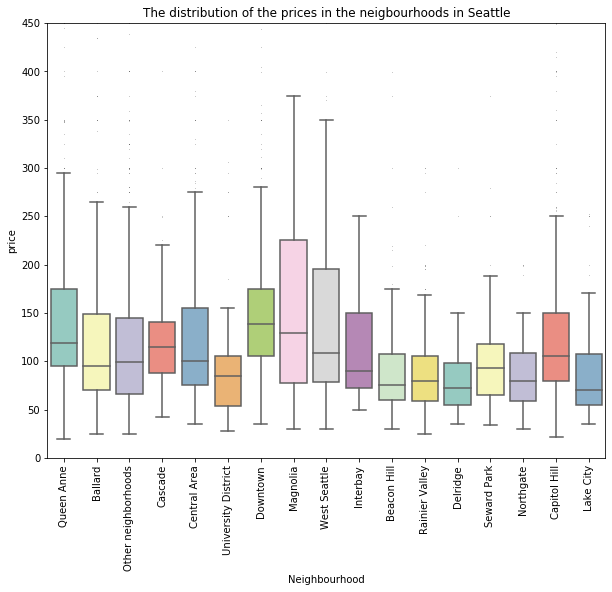

In [23]:
# Visualise the neighbbourhood counts, mean prices and distribution of the prices
#Countplot
plt.figure(figsize=(10,8))
ax=sns.countplot(x= "neighbourhood_group_cleansed",data=df,palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('The Listings in Seattle per neighbourhood')
plt.xlabel('Neighbourhood')

#Barplot    
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "neighbourhood_group_cleansed", y = 'price',estimator = np.mean,palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Neighbourhood')
#ax.set_ylim(0, 450);
plt.title('The average prices of the neighbourhoods in Seattle');

#Boxplot
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = df, x = "neighbourhood_group_cleansed", y = 'price', fliersize = 0.1,palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 450);
plt.title('The distribution of the prices in the neigbourhoods in Seattle')
plt.xlabel('Neighbourhood');

#### Evaluations
* Capitol Hill and Interbay have the highest(15%) and lowest(0.2%) listings in Seattle respectively
* On average the prices are highest in Magnolia (178) and lowest in Delridge(83)
* In general the prices in Seattle heighbourhoods are unevenly distributed.
* The prices in Seattle are most spread out in Magnolia as seen from the std = 150
* The prices in Seattle are least spread out in Northgate as seen from the std = 38

# Does the property type affect the price?
* To answer this question, I count the number and percentage shares of property types in Seattle.
* Then I calculate the price statistical features of each property type.
* I present the results in the tables  and graphs that follow.
* The evaluation is also presented after the visuals.

In [24]:
# The number and percentage share of the different property types
cat_counts(df,"property_type")

,property_type,Count,Perc
0,House,1733,0.454021
1,Apartment,1708,0.447472
2,Townhouse,118,0.030914
3,Condominium,91,0.023841
4,Loft,40,0.010479
5,Bed & Breakfast,37,0.009693
6,Other,22,0.005764
7,Cabin,21,0.005502
8,Camper/RV,13,0.003406
9,Bungalow,13,0.003406


In [25]:
# The prices of the different propert types in Seattle
stats_description(df,"property_type",'price')

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Apartment,122.932670,110.0,66.617706,999.0,20.0,110.0,230.00
Bed & Breakfast,112.054054,99.0,55.840022,299.0,30.0,99.0,207.40
Boat,282.375000,150.0,281.327434,775.0,75.0,150.0,741.75
Bungalow,115.615385,95.0,75.226922,349.0,65.0,95.0,233.20
Cabin,104.666667,95.0,55.218053,300.0,52.0,95.0,210.00
Camper/RV,120.461538,82.0,95.375237,375.0,45.0,82.0,309.00
Chalet,98.500000,98.5,51.618795,135.0,62.0,98.5,131.35
Condominium,151.109890,115.0,111.091099,700.0,50.0,115.0,320.00
Dorm,39.500000,39.5,2.121320,41.0,38.0,39.5,40.85
House,131.848094,95.0,104.823698,975.0,25.0,95.0,350.00


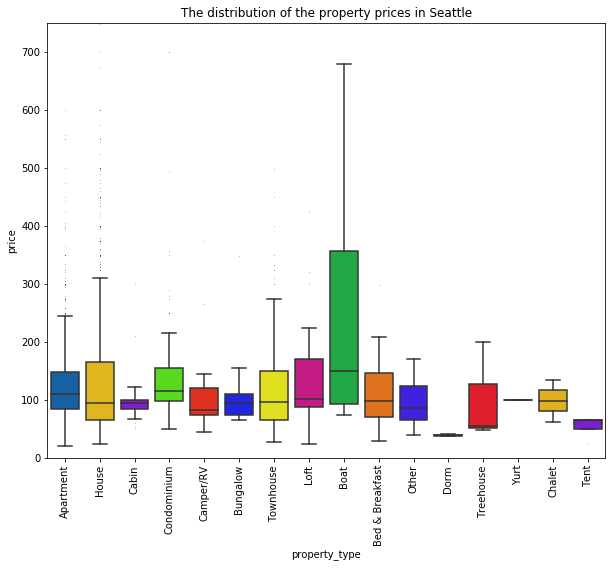

In [26]:
#Viualixe the distribution of the property prices in Seattle
#Box plots
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = df, x = "property_type", y = 'price', fliersize = 0.1,palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 750);
plt.title('The distribution of the property prices in Seattle');

### Results
* Aproximately 90% of the properties listed in Seattle are apartments and houses i.e. 45% and 44.7% respectively
* Yurts,dorms and charlet are the 3 least popular properties in Seattle.
* On avergae, a boat is the most highly priced property in Seattle with an average price 282.
  The prices for boats also have the highest spread (std = 281)
* The appartment prices range from 20 to 999, having the lowest(min) and highest(max)prices among the properties in Seattle.
* The dorm prices are the least spread (std=2) and this is because they also have the lowest counts in the data.

The property type one chooses will directly affect the price.

# Does the room type affect the price?
* To answer this question, I count the number and percentage shares of room types in Seattle.
* Then I calculate and compare the price statistical features of each room type.
* I present the results in the tables  and graphs that follow.
* The evaluation is also presented after the visuals.

In [27]:
#Count and share of room types in Seattle.
room_type_count = cat_counts(df,"room_type")
room_type_count

,room_type,Count,Perc
0,Entire home/apt,2541,0.665532
1,Private room,1160,0.303824
2,Shared room,117,0.030644


In [28]:
#Room type prices in Seattle.
stats_description(df,"room_type",'price')

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Entire home/apt,155.500097,126.0,95.088233,999.0,39.0,126.0,349.0
Private room,75.044828,69.0,34.603905,399.0,20.0,69.0,139.0
Shared room,47.547009,40.0,19.372704,118.0,22.0,40.0,95.0


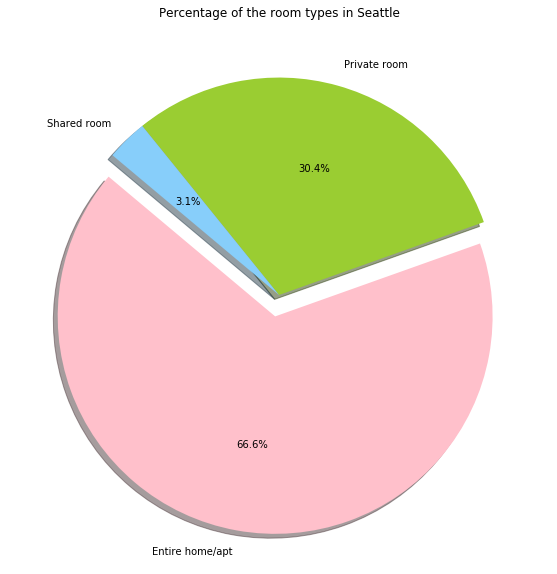

In [29]:
# Visualize the percentage share
labels = room_type_count['room_type']
sizes = room_type_count['Count']
colors = ['pink', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Pie-chart
plt.figure(figsize=(12,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of the room types in Seattle');

### Results
* Entire home/apartment take the highest share of room types 66.5% in Seattle
* Shared room have the lowest share 3.1% in Seattle
* Entire home/apartment charged the highest price on average.

# Are there extra fees and how do they vary?
* Yes there are other costs like the cleaning fees, security deposits and extra person fees.
* To understand how these fees vary, I calulate these fees based on the categorical variables.
* First I calculate the cleaning fees depending on the room type and property type.
* Secondly I calculate the security deposit in relation to the cancellation policy.

In [30]:
# Cleaning fee in relation to the property type in Seattle.
stats_description(df,"property_type",'cleaning_fee')

,mean_cleaning_fee,median_cleaning_fee,std_cleaning_fee,max_cleaning_fee,min_cleaning_fee,5th perc_cleaning_fee,95th perc_cleaning_fee
Apartment,59.134528,61.710904,33.118647,274.000000,5.000000,61.710904,112.300000
Bed & Breakfast,47.546435,61.710904,18.177494,61.710904,10.000000,61.710904,61.710904
Boat,86.891589,61.710904,82.178830,275.000000,15.000000,61.710904,213.750000
Bungalow,55.164055,50.000000,47.485751,200.000000,12.000000,50.000000,117.026542
Cabin,43.590387,50.000000,21.355985,61.710904,5.000000,50.000000,61.710904
Camper/RV,39.888809,30.000000,19.699103,61.710904,15.000000,30.000000,61.710904
Chalet,30.000000,30.000000,7.071068,35.000000,25.000000,30.000000,34.500000
Condominium,65.577002,61.710904,40.325102,250.000000,5.000000,61.710904,135.000000
Dorm,33.855452,33.855452,39.393558,61.710904,6.000000,33.855452,58.925359
House,65.181017,61.710904,49.361074,300.000000,5.000000,61.710904,160.000000


#### Results:
* On average a boat is the most expensive property to clean in Seattle with average cleaning price = 87.
* On average a yurt is the least expendive property to clean in Seattle with average cleaning price = 25.
  This is expected based on the kind of property it is.
* The highest cleaning fee paid is 300 for the property type house.
  I can't explain why this house's cleaning cost was this high but maybe the answer can be found in the data.

In [31]:
# Cleaning fee in relation to the room type in Seattle.
stats_description(df,"room_type",'cleaning_fee')

,mean_cleaning_fee,median_cleaning_fee,std_cleaning_fee,max_cleaning_fee,min_cleaning_fee,5th perc_cleaning_fee,95th perc_cleaning_fee
Entire home/apt,71.709209,61.710904,45.542219,300.0,5.0,61.710904,159.000000
Private room,41.592766,50.000000,22.185943,150.0,5.0,50.000000,61.710904
Shared room,44.030098,60.000000,20.035622,75.0,5.0,60.000000,61.710904


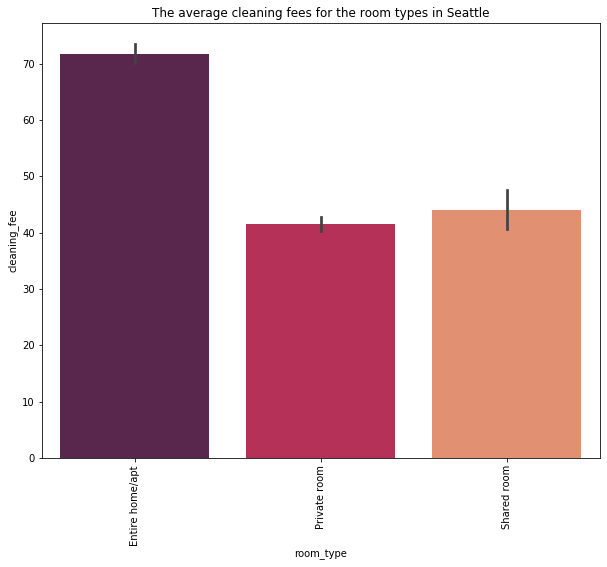

In [32]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "room_type", y = 'cleaning_fee',estimator = np.mean, palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(0, 450);
plt.title('The average cleaning fees for the room types in Seattle');

### Results
* Entire home/apartment are charged the highest cleaning fee (71.73)
* Cleaning fees for Entire home/apartment have the highest spread (45.5)
* The lowest price one can party for cleaning any room type in Seattle is 5 dollars (min price).
* One pays slightly more for cleaning a shared room than a private room (on average 3.5 difference)

In [33]:
# The number and percentage share of cancellation policies
cancellation_policy_count = cat_counts(df,"cancellation_policy")
cancellation_policy_count

,cancellation_policy,Count,Perc
0,strict,1417,0.371137
1,moderate,1251,0.327658
2,flexible,1150,0.301205


In [34]:
# Security deposit according to the cancellation policy.
stats_description(df,"cancellation_policy",'security_deposit')

,mean_security_deposit,median_security_deposit,std_security_deposit,max_security_deposit,min_security_deposit,5th perc_security_deposit,95th perc_security_deposit
flexible,250.983334,254.484832,72.992713,995.0,95.0,254.484832,300.0
moderate,235.035987,254.484832,96.351141,800.0,95.0,254.484832,425.0
strict,274.496989,254.484832,124.227605,995.0,95.0,254.484832,500.0


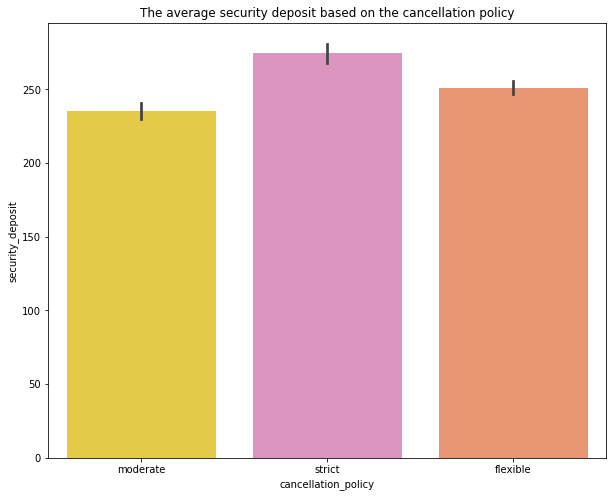

In [35]:
# Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='cancellation_policy',y='security_deposit',data=df,palette = "Set2_r");
plt.title('The average security deposit based on the cancellation policy');

### Results:
* The counts difference among the policies is considerably low.
* There are more hosts who opt for the strict policy compared to the other alternatives.
* Listings with a strict cancellation policy charger higher security deposits compared to those with flexible or moderate policies.
* I did not expect this result in fact my assumption was that listings with flexible policies charge the highest secutiy deposit to compensate for the losses that they are exposed to.